# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [ ]:
def linan(firstEquation, secondEquation):
  ans = []
  firstRateX = firstEquation[0]
  secondRateX = secondEquation[0]

  firstEquation[0] *= (-secondRateX / firstRateX)
  firstEquation[1] *= (-secondRateX / firstRateX)
  firstEquation[2] *= (-secondRateX / firstRateX)
  

  firstEquation[1] += secondEquation[1]
  firstEquation[2] += secondEquation[2]
  ans.append((secondEquation[2] - (secondEquation[1] * firstEquation[2]/firstEquation[1]))/secondEquation[0])
  ans.append(firstEquation[2]/firstEquation[1])
  print(ans)
  

linan([3,-1,85], [5,2,17])

[17.0, -34.0]


# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [ ]:
import numpy as np
def decorate_matrix(n):
  Z = np.zeros((n, n))
  Z[:,0]= np.ones(n)
  Z[0,:] = np.ones(n)
  Z[n - 1,:] = np.ones(n)
  Z[:, n - 1] = np.ones(n)
  print(Z)
decorate_matrix(666)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [ ]:
import math as m
import numpy as np
from scipy.optimize import fmin

def f(x, a, b):
  return (x + a) ** 2 - b

def g(x, a, b):
  return abs(f(x, a, b))
  

print(fmin(f, 0, args=(3, 4)))
print(fmin(g, 0, args=(3, 4)))

Optimization terminated successfully.
         Current function value: -4.000000
         Iterations: 28
         Function evaluations: 56
[-3.]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 54
[-1.]


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

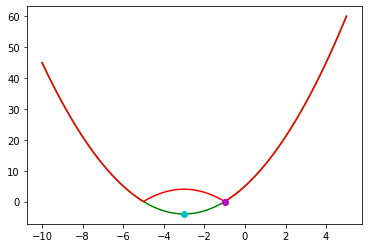

In [ ]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

def f(x, a, b):
  return ((x + a) ** 2 - b)

def g(x, a, b):
  return np.abs(f(x, a, b))
  

Fxlist = np.linspace(-10,5,100)
Fylist = f(Fxlist, 3, 4)

Gxlist = np.linspace(-10,5,100)
Gylist = g(Gxlist, 3, 4)


fig = plt.figure()


# plot the function
plt.plot(Fxlist, Fylist, 'g')
plt.plot(Gxlist, np.abs(Fylist), 'r')
plt.plot(-3,-4,'co')
plt.plot(-1,0,'mo')


# show the plot
plt.show()

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [54]:
import random as rmd

def getOnePersonResults():
    currStep = 0
    heads = 0
    tails = 0
    prevState = 0
    currState = 0
    cont = 0

    onePersonResult = []

    for i in range(10):
        currStep += 1

        if rmd.random() <= 0.5:
            heads += 1
            currState = 0
            if currStep <= 1:
                cont = 1
            else:
                if prevState == currState:
                    cont += 1
                else:
                    cont = 0
            prevState = 0
        else:
            tails += 1
            currState = 1
            if currStep == 1:
                cont = 1
            else:
                if prevState == currState:
                    cont += 1
                else:
                    cont = 0
            prevState = 1

        onePersonResult.append(cont)

    return onePersonResult


def getThousandsPeopleResult():
    cnt8continuesCases = 0
    cnt10continuesCases = 0

    for i in range(1000):

        onePersonResult = getOnePersonResults()

        if onePersonResult[7] == 8 or onePersonResult[8] == 8 or onePersonResult[9] == 8:
            cnt8continuesCases += 1

        if onePersonResult[9] == 10:
            cnt10continuesCases += 1

    overAllResults = [cnt8continuesCases,cnt10continuesCases]

    return overAllResults

# n - number of experiments which we need to take
def runExperiment(n):

    cnt8continuesCases = 0
    cnt10continuesCases = 0
    cnt10continuesCasesFor3People = 0

    for i in range(n):
        overAllResults = getThousandsPeopleResult()

        if overAllResults[0] >= 1:
            cnt8continuesCases += 1

        if overAllResults[1] >= 1:
            cnt10continuesCases += 1

            if overAllResults[1] == 3:
                cnt10continuesCasesFor3People += 1

    print(cnt8continuesCases / n)
    print(cnt10continuesCases / n)
    print(cnt10continuesCasesFor3People / n)


runExperiment(10000)

1.0
0.8586
0.1647
